<a href="https://colab.research.google.com/github/ilham-fikri/Data-Mining-Bayes-Pencemaran/blob/main/Tugas_Data_Mining_Bayes_Pencemaran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
dataset = pd.read_csv("pencemaran.csv")
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, -1].values

In [15]:
print(x)

[[30 31]
 [28 43]
 [16 43]
 [29 51]
 [40 49]
 [22 46]
 [19 58]
 [36 98]
 [20 36]
 [14 37]
 [19 45]
 [28 45]
 [27 39]
 [13 32]
 [27 48]
 [31 43]
 [20 50]
 [19 45]
 [23 41]
 [19 39]
 [25 56]
 [21 40]
 [23 81]
 [30 46]
 [24 44]
 [19 25]
 [27 30]
 [23 58]
 [23 35]
 [37 35]
 [18 32]]


In [16]:
print(y)

[1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1]


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [24]:
print(x_train)

[[-0.97672345 -0.00647836]
 [ 0.85372864  0.06802282]
 [-0.47750924  0.06802282]
 [-0.81031871  0.36602754]
 [-0.81031871 -0.67698899]
 [ 0.35451444  0.21702518]
 [-0.14469977 -0.08097954]
 [ 0.02170497  0.81303463]
 [ 0.52091917 -0.15548073]
 [-1.14312818 -0.97499372]
 [-0.97672345  0.96203699]
 [ 2.517776    0.29152636]
 [-0.31110451 -0.30448309]
 [-0.31110451 -0.75149017]
 [-0.97672345 -0.45348545]
 [-1.80874713 -0.60248781]
 [ 1.85215706  3.94208424]
 [ 0.35451444 -1.12399608]
 [ 0.68732391  0.44052872]
 [ 0.85372864 -1.0494949 ]
 [-0.64391398 -0.37898427]
 [ 1.02013338 -0.15548073]
 [ 0.35451444 -0.45348545]]


In [25]:
print(x_test)

[[-1.47593765 -0.15548073]
 [ 2.01856179 -0.75149017]
 [-1.97515186 -0.97499372]
 [-0.97672345 -0.00647836]
 [-0.31110451  0.96203699]
 [-0.97672345 -1.49650199]
 [-0.31110451  2.67556416]
 [ 0.52091917 -0.00647836]]


In [26]:
print(y_train)

[1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]


In [27]:
print(y_test)

[0 1 1 1 1 1 0 0]


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_pred = classifier.predict(x_test)

In [28]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1])

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 2]
 [1 4]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


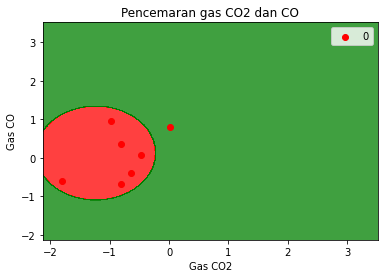

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


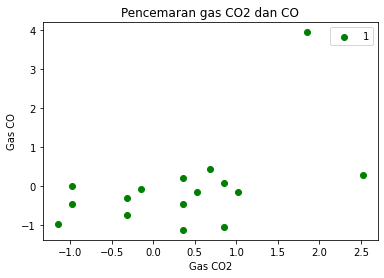

In [23]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step= 0.01),
np.arange(start = x_set[:,1].min()-1, stop = x_set[:,0].max()+1, step= 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                                        alpha= 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set ==j,0],x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i), label = j)
  plt.title('Pencemaran gas CO2 dan CO')
  plt.xlabel('Gas CO2')
  plt.ylabel('Gas CO')
  plt.legend()
  plt.show() 